# Flight Fare Prediction


| Project Case |Stusy Case| Author |
| -- | -- | -- |
| Flight Fare Prediction| India |Adela Farah Aglia |
| | |



---
# Introduction
Jaman sekarang, pesawat merupakan salah satu pilihan transportasi yang disukai karena efektif dari segi waktu. Namun, harga tiket pesawat sering mengalami fluktuasi karena beberapa kondisi. Maka dari itu, author ingin mencari the best model machine learning untuk memprediksi harga pesawat yang nantinya dapat membantu pihak airlines dalam memprediksi berapa harga yang dapat mereka kelola berdasarkan keadaan tertentu.

#Objective
Objective project yang author kerjakan yaitu untuk memprediksi harga pesawat yang ditentukan beberapa parameter/features.
Karena Target/dependent variable yang author inginkan adalah harga(continous numeric value) maka ini termasuk regression problem.


# Data Collection

<h3> <b>Data Source: </b></h3>
Author memakai Data Airlines yang tersedia di platform Kaggle </br>
Source: https://www.kaggle.com/absin7/airlines-fare-prediction</br>

<h4>Deskripsi kolom/variabel:</h4>

|Kolom | Deskripsi|
|--|--|
|Airline| Nama Maskapai|
|Date_of_Journey| Tanggal Keberangkatan|
| Source | Lokasi Keberangkatan|
| Destination | Lokasi Kedatangan/tujuan|
| Route | Informasi tentang lokasi awal dan akhir perjalanan|
| Dep_Time| Waktu keberangkatan penerbangan dari lokasi awal |
| Arrival_Time | Waktu kedatangan penerbangan di tempat tujuan |
| Durasi | Durasi perjalanan dalam jam/menit |
| Total_stop | Jumlah total stop penerbangan sebelum mendarat di lokasi tujuan|
| Additional_info | Informasi tambahan tentang penerbangan|
| Price | Harga penerbangan |


# Imported Library

In [279]:
# Imported Library
import pandas as pd
import numpy as np
import scipy
import warnings
warnings.filterwarnings("ignore")

from pandas_profiling import ProfileReport
import re

# Plotting Usage
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Plotting usage plotly package
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [280]:
!git clone https://github.com/AdelaFarah13/Data-Source.git

fatal: destination path 'Data-Source' already exists and is not an empty directory.


# Read Dataset

In [281]:
train_data= pd.read_csv('https://raw.githubusercontent.com/AdelaFarah13/Data-Source/main/Project%20Final%20Test/Data_Train.xlsx%20-%20Sheet1.csv')
train_data.head()

Airline Date_of_Journey    Source  ... Total_Stops Additional_Info  Price
0       IndiGo      24/03/2019  Banglore  ...    non-stop         No info   3897
1    Air India       1/05/2019   Kolkata  ...     2 stops         No info   7662
2  Jet Airways       9/06/2019     Delhi  ...     2 stops         No info  13882
3       IndiGo      12/05/2019   Kolkata  ...      1 stop         No info   6218
4       IndiGo      01/03/2019  Banglore  ...      1 stop         No info  13302

[5 rows x 11 columns]

In [282]:
#Check shape of train_data
train_data.shape

(10683, 11)

Pada dataset yang telah kita kumpulkan, mempunyai **10.683 baris** dan **11 kolom**.

# Data Exploration

In [283]:
!pip3 install -U https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

!pip3 install -U pandas-profiling

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [284]:
# Mini Exploration Analysis with pandas profilling

profile = ProfileReport(train_data, title="Pandas Profiling Report", explorative=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Pada bagian'Overview' dari report pandas profilling memberikan informasi sederhana tentang dataset yang kita gunakan. Untuk data yang sekarang kita gunakan kita mendapatkan beberapa informasi, yaitu:

Jumlah Variabel : 11
Jumlah Baris : 10.683
Jumlah Kategorikal fitur : 10 
Jumlah Numerical fitur : 1
*Missing Value* : 2
*Duplicate row* : 195

## Descriptive Statistics

In [285]:
train_data.describe()

Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000

# Data Pre-processing

## Check Missing Value

In [286]:
import missingno

In [287]:
(train_data.isna().sum()/train_data.shape[0])*100

Airline            0.000000
Date_of_Journey    0.000000
Source             0.000000
Destination        0.000000
Route              0.009361
Dep_Time           0.000000
Arrival_Time       0.000000
Duration           0.000000
Total_Stops        0.009361
Additional_Info    0.000000
Price              0.000000
dtype: float64

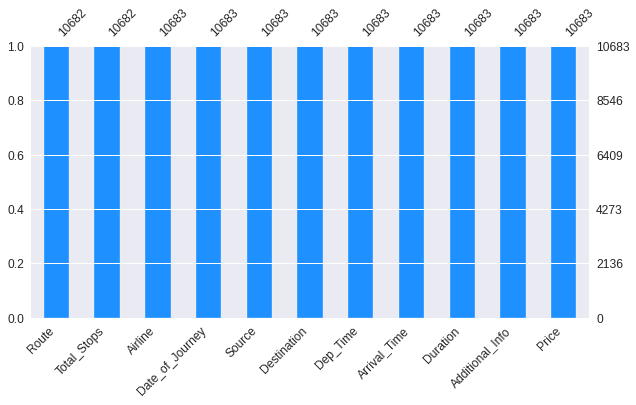

In [288]:
# Airlines dataset Missing Data Bar Chart
missingno.bar(train_data, color='dodgerblue', sort="ascending", figsize=(10,5), fontsize=12)

Di atas ini auhtor memplot jumlah nilai per kolom dan mengabaikan missing value pada dataset Airlines. Hasilnya Kolom yang mempunyai missing value adalah Route dan Total_Stops

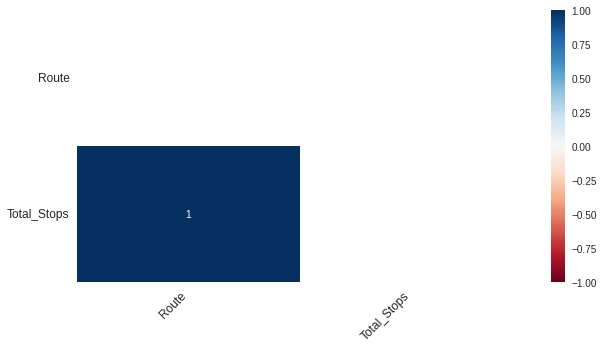

In [289]:
# Airlines Dataset Missing Data Heatmap
missingno.heatmap(train_data, figsize=(10,5), fontsize=12)

Plot heatmap akan menunjukan korelasi antara kolom/feature yang memiliki missing value. 

Kita dapat melihat dari dataset bahwa Total_stops dan Route memiliki korelasi `1` → $\color{red}{\text{Positive Correlation/ High Correlation}}$ Artinya jika Nilai kolom 'Route' hilang maka Nilai kolom 'Total_stops' juga menghilang.

#### Drop Missing value

Karena jumlah Missing pada kolom 'Route' dan 'Total_stops' adalah 0.0094%, author memilih untuk drop nilai yang hilang.

In [290]:
# Membuang nilai NaN pada dataset
train_data.dropna(inplace= True)

In [291]:
#check again missing value
train_data.isna().sum() 

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## Duplicate Data

In [292]:
print('jumlah row sebelum dibersihkan:', train_data.shape[0])

jumlah row sebelum dibersihkan: 10682


In [293]:
# Mengecek row yang mempunyai duplicate
train_data[train_data.duplicated(keep='first')]

Airline Date_of_Journey  ...              Additional_Info  Price
683    Jet Airways       1/06/2019  ...                      No info  13376
1061     Air India      21/05/2019  ...                      No info  10231
1348     Air India      18/05/2019  ...                      No info  12392
1418   Jet Airways       6/06/2019  ...  In-flight meal not included  10368
1674        IndiGo      24/03/2019  ...                      No info   7303
...            ...             ...  ...                          ...    ...
10594  Jet Airways      27/06/2019  ...                      No info  12819
10616  Jet Airways       1/06/2019  ...                      No info  13014
10634  Jet Airways       6/06/2019  ...  In-flight meal not included  11733
10672  Jet Airways      27/06/2019  ...  In-flight meal not included  11150
10673  Jet Airways      27/05/2019  ...                      No info  16704

[220 rows x 11 columns]

In [294]:
# Drop duplicate data
train_data = train_data.drop_duplicates(keep='first')

In [295]:
#Duplicate Data Check
print('jumlah row setelah dibersihkan:', train_data.shape[0])

jumlah row setelah dibersihkan: 10462


Mari cek lagi untuk memastikan sudah tidak ada data duplikat

In [296]:
train_data[train_data.duplicated(keep= False)]

Empty DataFrame
Columns: [Airline, Date_of_Journey, Source, Destination, Route, Dep_Time, Arrival_Time, Duration, Total_Stops, Additional_Info, Price]
Index: []

## Handling Date and Time Variables

In [297]:
#Cheking data type for train_data dataset
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

*as we see*, terdapat beberapa kolom yang tidak memiliki tipe data yang sesuai, seperti:


*   kolom `Date_of_Journey`, `Dep_Time`, `Arrival_Time` dari Object harus diubah menjadi tipe datetime
*   Kolom `Duration` harus diubah menjadi numeical

Kita dapat melakukan Future Engineering pada kolom tersebut



In [298]:
#Merubah struktur tipe data yang tidak sesuai dengan variablenya.

#Membuat fungsi
def change_into_datetime(col):
  train_data[col]=pd.to_datetime(train_data[col])

In [299]:
columns =['Date_of_Journey','Dep_Time','Arrival_Time']

for i in columns:
  change_into_datetime(i)

In [300]:
#Check kembali kolom yang telah kita ubah data type nya
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

### Feature Engineering column Date of Joruney

In [301]:
# Kolom Date of Journey di split untuk tahap machine learning memahami apa sebenarnya isi kolom journey

train_data['Day_Journey'] = train_data['Date_of_Journey'].dt.day
train_data['Month_Journey'] = train_data['Date_of_Journey'].dt.month

In [302]:
train_data.head()

Airline Date_of_Journey    Source  ...  Price Day_Journey Month_Journey
0       IndiGo      2019-03-24  Banglore  ...   3897          24             3
1    Air India      2019-01-05   Kolkata  ...   7662           5             1
2  Jet Airways      2019-09-06     Delhi  ...  13882           6             9
3       IndiGo      2019-12-05   Kolkata  ...   6218           5            12
4       IndiGo      2019-01-03  Banglore  ...  13302           3             1

[5 rows x 13 columns]

In [303]:
# Drop kolom Date of Journey

train_data.drop('Date_of_Journey', axis=1, inplace=True)

In [304]:
#================================================================================================================
# Kolom Dep_time dan Arrival_Time
# Tujuan : Mengambil Jam dan Menit dari masing-masing kolom
#================================================================================================================

def extract_hour(df,column):
  for col in column:
    df[col+'_hour']=df[col].dt.hour

def extract_min(df,column):
  for col in column:
    df[col+'_minute']=df[col].dt.minute

#================================================================================================================
# Kolom Duration
# Problem → Format masih berantakan, maka dari itu author akan menyamakan formatnya.
# Jika Duration hanya bernilai 19h (jam saja) maka akan kita ubah menjadi 19h 0 m
# Jika Duration hanya bernilai 30m (menit saja) maka akan kita ubah menjadi 0h 30m
#================================================================================================================

# Split terlebih dahulu nilai dari kolom Duration
def split_column(df,col):
  #duration = list(df[col])

  for i in range(len(df[col])):
      if len(df[col].iloc[i].split(' ')) == 2:
          pass
      else:
          if 'h' in df[col].iloc[i]:
            df[col].iloc[i]= df[col].iloc[i] + ' 0m'
            #duration[i] +' '+'0m'
          else:
            df[col].iloc[i] = '0h ' + df[col].iloc[i]

# Hanya mengambil angka jam saja
def hour_duration(x):
    return x.split(' ')[0][0:-1]

# Hanya mengambil angka menit saja
def minute_duration(x):
    return x.split(' ')[1][0:-1]
    
#================================================================================================================
# Function untuk menghapus kolom
#================================================================================================================
def drop_column(df,column):
  for col in column:
    df.drop(col,axis=1, inplace=True)

### Feature Engineering of column Dep_Time and Arrival_Time

In [305]:
# Meng ekstraksi jam dan menit pada kolom Dep_Time dan Arrival_Time
extract_hour(train_data, ['Dep_Time','Arrival_Time'])
extract_min(train_data, ['Dep_Time','Arrival_Time'])


In [306]:
train_data.head()

Airline    Source  ... Dep_Time_minute Arrival_Time_minute
0       IndiGo  Banglore  ...              20                  10
1    Air India   Kolkata  ...              50                  15
2  Jet Airways     Delhi  ...              25                  25
3       IndiGo   Kolkata  ...               5                  30
4       IndiGo  Banglore  ...              50                  35

[5 rows x 16 columns]

### Feature Engineering of column Duration

In [307]:
# Split column Duration
split_column(train_data, 'Duration')

In [308]:
train_data.head()

Airline    Source  ... Dep_Time_minute Arrival_Time_minute
0       IndiGo  Banglore  ...              20                  10
1    Air India   Kolkata  ...              50                  15
2  Jet Airways     Delhi  ...              25                  25
3       IndiGo   Kolkata  ...               5                  30
4       IndiGo  Banglore  ...              50                  35

[5 rows x 16 columns]

In [309]:
#Column Duration apply function
train_data['Duration_hours'] = train_data['Duration'].apply(hour_duration).astype(int)
train_data['Duration_minute'] = train_data['Duration'].apply(minute_duration).astype(int)

In [310]:
train_data.head()

Airline    Source  ... Duration_hours Duration_minute
0       IndiGo  Banglore  ...              2              50
1    Air India   Kolkata  ...              7              25
2  Jet Airways     Delhi  ...             19               0
3       IndiGo   Kolkata  ...              5              25
4       IndiGo  Banglore  ...              4              45

[5 rows x 18 columns]

#### Visualisasi 3D kolom Source, Destination, dan Duration

In [311]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

fig = px.scatter_3d(train_data, x='Source', y='Destination', z='Duration')
fig.update_traces(marker_size=3, marker_opacity=0.5)

fig.update_layout(
        title =dict(
        text = 'Source, Destination, and Duration',
        x=0.5,
        xanchor='center'
    )
)
fig.show()

In [312]:
fig = px.scatter_3d(train_data, x='Source', y='Destination', z='Price')
fig.update_traces(marker_size=3, marker_opacity=0.5)
fig.update_layout(
        title =dict(
        text = 'Source, Destination, and Price',
        x=0.5,
        xanchor='center'
    )
)
fig.show()

In [313]:
#Check Again datatype each columns
train_data.dtypes

Airline                        object
Source                         object
Destination                    object
Route                          object
Dep_Time               datetime64[ns]
Arrival_Time           datetime64[ns]
Duration                       object
Total_Stops                    object
Additional_Info                object
Price                           int64
Day_Journey                     int64
Month_Journey                   int64
Dep_Time_hour                   int64
Arrival_Time_hour               int64
Dep_Time_minute                 int64
Arrival_Time_minute             int64
Duration_hours                  int64
Duration_minute                 int64
dtype: object

In [314]:
# Pisahkan kolom yang termasuk Categorical data

categorical_col = [col for col in train_data.columns if train_data[col].dtype=='object']
categorical_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [315]:
# Pisahkan kolom yang termasuk Numerical Data
continous_col = [col for col in train_data.columns if train_data[col].dtype==('int64','float64')]
continous_col.remove('Price')

continous_col

['Day_Journey',
 'Month_Journey',
 'Dep_Time_hour',
 'Arrival_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_minute']

### Feature Transformation and Scaling-MinMaxScaler

In [316]:
from sklearn.preprocessing import MinMaxScaler

In [317]:
scaler = MinMaxScaler()

In [318]:
scaler.fit(train_data[continous_col])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [319]:
print('Minimum:')
list(scaler.data_min_)

Minimum:


[3.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [320]:
print('Maximum:')
list(scaler.data_max_)

Maximum:


[27.0, 12.0, 23.0, 23.0, 55.0, 55.0, 47.0, 55.0]

In [321]:
train_data[continous_col].describe().loc[['min','max']]

Day_Journey  Month_Journey  ...  Duration_hours  Duration_minute
min          3.0            1.0  ...             0.0              0.0
max         27.0           12.0  ...            47.0             55.0

[2 rows x 8 columns]

In [322]:
train_data[continous_col] = scaler.transform(train_data[continous_col])
train_data[continous_col].describe()

Day_Journey  Month_Journey  ...  Duration_hours  Duration_minute
count  10462.000000   10462.000000  ...    10462.000000     10462.000000
mean       0.401254       0.412236  ...        0.213323         0.512913
std        0.366318       0.272304  ...        0.178256         0.306894
min        0.000000       0.000000  ...        0.000000         0.000000
25%        0.083333       0.181818  ...        0.042553         0.272727
50%        0.125000       0.363636  ...        0.170213         0.545455
75%        0.750000       0.454545  ...        0.319149         0.818182
max        1.000000       1.000000  ...        1.000000         1.000000

[8 rows x 8 columns]

## Handle Categorical Data & Future Encoding

Untuk melakukan permodelan Machine Learning kita perlu mengkonversi data kategorikal menjadi angka yang dimengerti oleh mesin.

Diatas kita telah melakukan pemisahan Kolom yang bersifat kategorikal dan kolom yang bersifat Numerikal. 

Kolom kategorikal yang punya yaitu : 'Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info'

Pada tahap ini kita akan menentukan kolom tersebut akan dikonversi secara Onehot Encoding atau Label Encoder


In [323]:
# Create new dataframe for categorical data

categorical= train_data[categorical_col]
categorical.head()

Airline    Source Destination  ... Duration Total_Stops Additional_Info
0       IndiGo  Banglore   New Delhi  ...   2h 50m    non-stop         No info
1    Air India   Kolkata    Banglore  ...   7h 25m     2 stops         No info
2  Jet Airways     Delhi      Cochin  ...   19h 0m     2 stops         No info
3       IndiGo   Kolkata    Banglore  ...   5h 25m      1 stop         No info
4       IndiGo  Banglore   New Delhi  ...   4h 45m      1 stop         No info

[5 rows x 7 columns]

#### Column Airline





In [324]:
categorical['Airline'].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [325]:
# Melihat Hubungan Airline terhadap harga pesawat
fig = px.box(train_data.sort_values('Price', ascending= False),
             x='Airline',
             y='Price',)

fig.update_layout(
        title =dict(
        text = 'Distribution Airline VS Price',
        x=0.5,
        xanchor='center'
    )
)
fig.show()

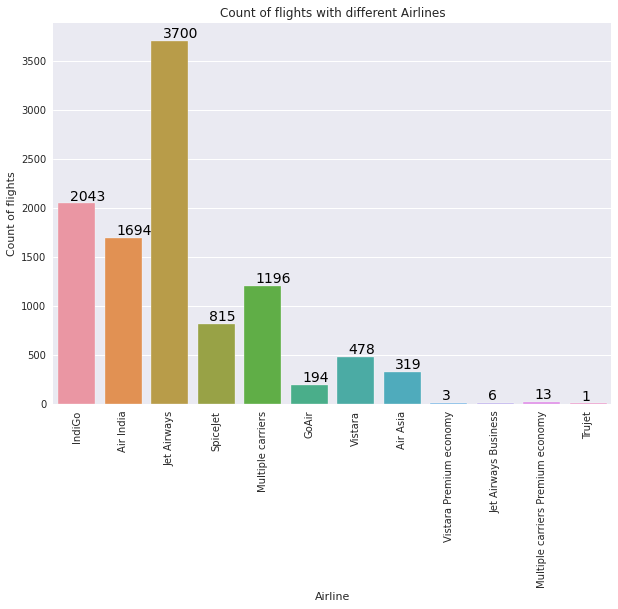

In [326]:
plt.figure(figsize = (10, 7))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =train_data)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

<h4> Get Insight: </h4>

`Jet Airways Business` mempunyai range harga penerbangan yang paling tinggi dibandingkan dengan maskapai airline lainnya hampir mempunyai range harga yang sama. Karena Maskapai Jet Airway Business merupakan tipe class yang exlusive sehingga harganya jauh lebih tinggi dibandingkan dengan tipe class yang lainnya.

Pada kolom `Airline` author akan menggunakan OneHot Encoder karena kolom ini tidak mempunyai hirarki/order yang artinya termasuk **Nominal Categorical Data**

In [327]:
# melakukan LabelEncoder pada kolom Airline
Airline = pd.get_dummies(categorical[['Airline']],drop_first=True)

In [328]:
Airline.head()

Airline_Air India  ...  Airline_Vistara Premium economy
0                  0  ...                                0
1                  1  ...                                0
2                  0  ...                                0
3                  0  ...                                0
4                  0  ...                                0

[5 rows x 11 columns]

#### Column Source

In [329]:
categorical['Source'].value_counts()

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [330]:
# Check Distribution Source VS Price
fig = px.box(train_data.sort_values('Price', ascending= False),
             x='Source',
             y='Price',)

fig.update_layout(
        title =dict(
        text = 'Distribution Source VS Price',
        x=0.5,
        xanchor='center'
    )
)

<h4> Get Insight </h4>

Kota Bangalore merupakan ibu kota dari Negara bagian Karnata, India dan mempunyai perubahan yang paling tinggi dalam naik turunnya harga pesawat.

Kota Delhi merupakan ibu kota dari Negara India mempunyai nilai median yang paling besar dibandingkan kota lainnya di India.

Pada kolom `Source` author akan menggunakan OneHot Encoder karena kolom ini tidak mempunyai hirarki atau order dan memiliki nilai unique yang rendah(hanya da 4)

In [331]:
# melakukan LabelEncoder pada kolom Source
Source = pd.get_dummies(categorical[['Source']],drop_first=True)

In [332]:
Source.head()

Source_Chennai  Source_Delhi  Source_Kolkata  Source_Mumbai
0               0             0               0              0
1               0             0               1              0
2               0             1               0              0
3               0             0               1              0
4               0             0               0              0

#### Column Destination

In [333]:
categorical['Destination'].value_counts()

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [334]:
# Check Distribution Destination VS Price
fig = px.box(train_data.sort_values('Price', ascending= False),
             x='Destination',
             y='Price',)

fig.update_layout(
        title =dict(
        text = 'Distribution Destination vs Price',
        x=0.5,
        xanchor='center'
    )
)

<h4> Get Insight </h4>

Kota New Delhi merupakan pusat administrasi Negara India menjadi kota yang mempunyai harga yang paling tinggi dan fluktuasi dibandingkan dengan destinasi kota lainnya di India.

Sementara penerbangan yang menuju ke kota Delhi mempunya fluktuasi paling rendah dan Destinasi Kota Hyderabad mempunyai nilai yang paling kecil.

Pada kolom `Destination` author akan menggunakan OneHot Encoder karena kolom ini tidak mempunyai hirarki atau order dan memiliki nilai unique yang rendah(hanya ada 6)

In [335]:
# melakukan encode pada kolom Destination
Destination = pd.get_dummies(categorical[['Destination']],drop_first=True)

In [336]:
Destination.head()

Destination_Cochin  ...  Destination_New Delhi
0                   0  ...                      1
1                   0  ...                      0
2                   1  ...                      0
3                   0  ...                      0
4                   0  ...                      1

[5 rows x 5 columns]

#### Column Route

In [337]:
# Split kolom Route dengan memisahkan symbol →

categorical['Route'].str.split('→') #alt+▼+26 -> →

0                      [BLR ,  DEL]
1        [CCU ,  IXR ,  BBI ,  BLR]
2        [DEL ,  LKO ,  BOM ,  COK]
3               [CCU ,  NAG ,  BLR]
4               [BLR ,  NAG ,  DEL]
                    ...            
10678                  [CCU ,  BLR]
10679                  [CCU ,  BLR]
10680                  [BLR ,  DEL]
10681                  [BLR ,  DEL]
10682    [DEL ,  GOI ,  BOM ,  COK]
Name: Route, Length: 10462, dtype: object

In [338]:
# Membuat kolom Baru sesuai dengan jumlah titik Route
categorical['Route_1'] =categorical['Route'].str.split('→').str[0]
categorical['Route_2'] =categorical['Route'].str.split('→').str[1]
categorical['Route_3'] =categorical['Route'].str.split('→').str[2]
categorical['Route_4'] =categorical['Route'].str.split('→').str[3]
categorical['Route_4'] =categorical['Route'].str.split('→').str[4]

In [339]:
# Mengecek kolom yang baru ditambahkan pada dataset Categorikal
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Route_1', 'Route_2', 'Route_3', 'Route_4'],
      dtype='object')

In [340]:
categorical.head()

Airline    Source Destination  ... Route_2 Route_3 Route_4
0       IndiGo  Banglore   New Delhi  ...     DEL     NaN     NaN
1    Air India   Kolkata    Banglore  ...    IXR     BBI      NaN
2  Jet Airways     Delhi      Cochin  ...    LKO     BOM      NaN
3       IndiGo   Kolkata    Banglore  ...    NAG      BLR     NaN
4       IndiGo  Banglore   New Delhi  ...    NAG      DEL     NaN

[5 rows x 11 columns]

In [341]:
# Mengisi nilai nan pada kolom Route
for i in ['Route_2', 'Route_3', 'Route_4']:
    categorical[i].fillna('None', inplace=True)

In [342]:
# Delete column Route because not necesarry
drop_column(categorical,['Route'])

In [343]:
#Checking Missing Value
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Duration           0
Total_Stops        0
Additional_Info    0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
dtype: int64

In [344]:
for i in categorical.columns:
  print('{} has total {} categories'.format(i, len(categorical[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Duration has total 368 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route_1 has total 5 categories
Route_2 has total 45 categories
Route_3 has total 30 categories
Route_4 has total 6 categories


Dengan ini kita ketahui setiap feature mempunyai banyak feature lagi, terutama pada feature route 2, route 3.

Artinya untuk menyelasikan issue ini dengan melakukan onehot encoding tidaklah tepat. Mari kita coba dengan label encorder

In [345]:
from sklearn.preprocessing import LabelEncoder

In [346]:
encoder=LabelEncoder()

In [347]:
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4']:
 categorical[i] =  encoder.fit_transform(categorical[i])

In [348]:
categorical.head()

Airline    Source Destination  ... Route_2 Route_3 Route_4
0       IndiGo  Banglore   New Delhi  ...      13      29       5
1    Air India   Kolkata    Banglore  ...      25       1       5
2  Jet Airways     Delhi      Cochin  ...      32       4       5
3       IndiGo   Kolkata    Banglore  ...      34       3       5
4       IndiGo  Banglore   New Delhi  ...      34       8       5

[5 rows x 10 columns]

#### Columns Additional Info

In [349]:
categorical['Additional_Info'].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

Dapat dikatakan kolom 'Additonal_Info' menjelaskan kelebihan atau kekurangan dari maskapai yang kita pilih mungkin dapat mempengaruhi Harga pesawat.

In [350]:
# Terdapat duplicate Nilai 'No Info'

categorical['Additional_Info'].replace({"No info": 'No Info'}, inplace = True)

Karena kolom 'Additional_Info' termasuk kedalam Nominal Categorical Data(Tidak mempunyai urutan nilai) maka author akan melakukan OneHot Encoder pada kolom ini.

In [351]:
Add_info = categorical[["Additional_Info"]]
Add_info = pd.get_dummies(Add_info, drop_first = True)

In [352]:
Add_info.head()

Additional_Info_1 Short layover  ...  Additional_Info_Red-eye flight
0                                0  ...                               0
1                                0  ...                               0
2                                0  ...                               0
3                                0  ...                               0
4                                0  ...                               0

[5 rows x 8 columns]

#### Columns Total Stop

In [353]:
categorical['Total_Stops'].value_counts()

1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

In [354]:
# Melihat Hubungan Total_Stop terhadap harga pesawat
fig = px.box(train_data.sort_values('Price', ascending= False),
             x='Total_Stops',
             y='Price',)

fig.update_layout(
        title =dict(
        text = 'Boxplot of Total Stops by Price',
        x=0.5,
        xanchor='center'
    )
)
fig.show()

In [355]:
fig = px.scatter(train_data, 
                 x='Total_Stops', 
                 y='Price', 
                 color='Source', 
                 opacity=0.8, 
                 hover_data=['Airline']
                )
fig.update_traces(marker_size=5)
fig.update_layout(
        title =dict(
        text = 'Scatter Plot of Total Stops vs Price',
        x=0.5,
        xanchor='center'
    )
)
fig.show()

<h4> Get Insight </h4>

`1-stop` memiliki outlier tertinggi dari padah total stop yang lain. Artinya perjalanan yang mempunyai one stop mungkin mempunyai harga yang paling mahal dari pada yang lain.

Pada penerbangan 4 stops kita bisa melihat tidak adanya perubahan naik-turunnya harga secara dramatis seperti penerbangan lainya mungkin dapat disebabkan karena distribusi datanya tidak sama dengan tipe Total_Stop lainnya atau maskapai jarang melakukan perjalanan yang melakukan 4 titik pemberhentian.



In [356]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [357]:
dict_ttl_stop={'non-stop':0, '2 stops':1, '1 stop':2, '3 stops':3, '4 stops':4}

Kolom 'Total_Stops' Termasuk kedalam **Ordinal Categorical Data** karena mempunyai hirarki atau meaning pada masing-masing value sehingga author akan melakukan LabelEncoder.

In [358]:
categorical['Total_Stops']= categorical['Total_Stops'].map(dict_ttl_stop)

In [359]:
categorical.head()

Airline    Source Destination  ... Route_2  Route_3 Route_4
0       IndiGo  Banglore   New Delhi  ...      13       29       5
1    Air India   Kolkata    Banglore  ...      25        1       5
2  Jet Airways     Delhi      Cochin  ...      32        4       5
3       IndiGo   Kolkata    Banglore  ...      34        3       5
4       IndiGo  Banglore   New Delhi  ...      34        8       5

[5 rows x 10 columns]

## Auto Visualization Graph with AutoViz

In [360]:
pip install AutoViz

In [361]:
!pip3 install xlrd

In [362]:
from autoviz.AutoViz_Class import AutoViz_Class

Shape of your Data Set loaded: (10683, 11)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  5
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  5
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    11 Predictors classified...
        This does not include the Target column(s)
        5 variables removed since they were ID or low-information variables


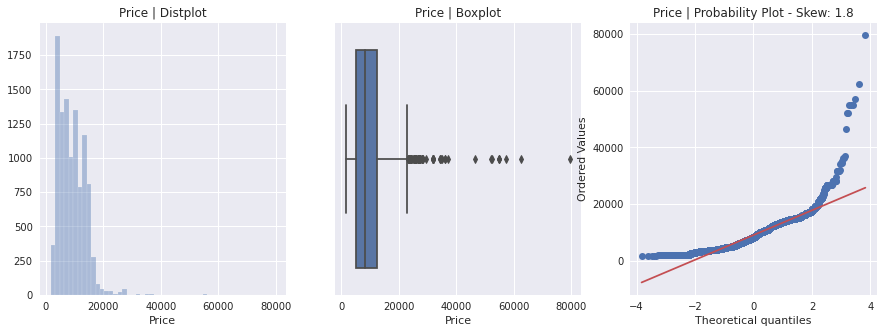

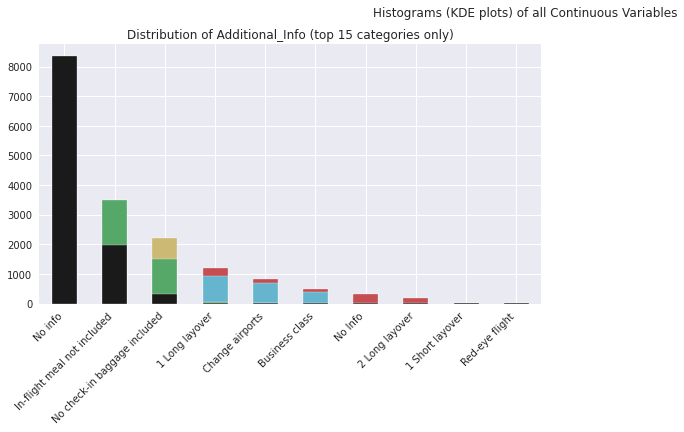

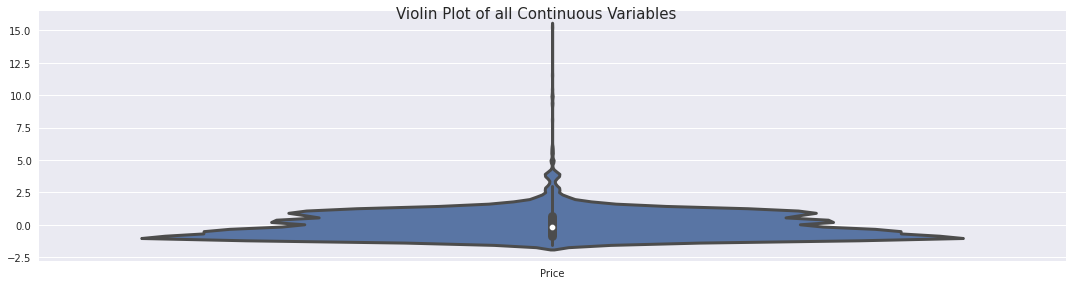

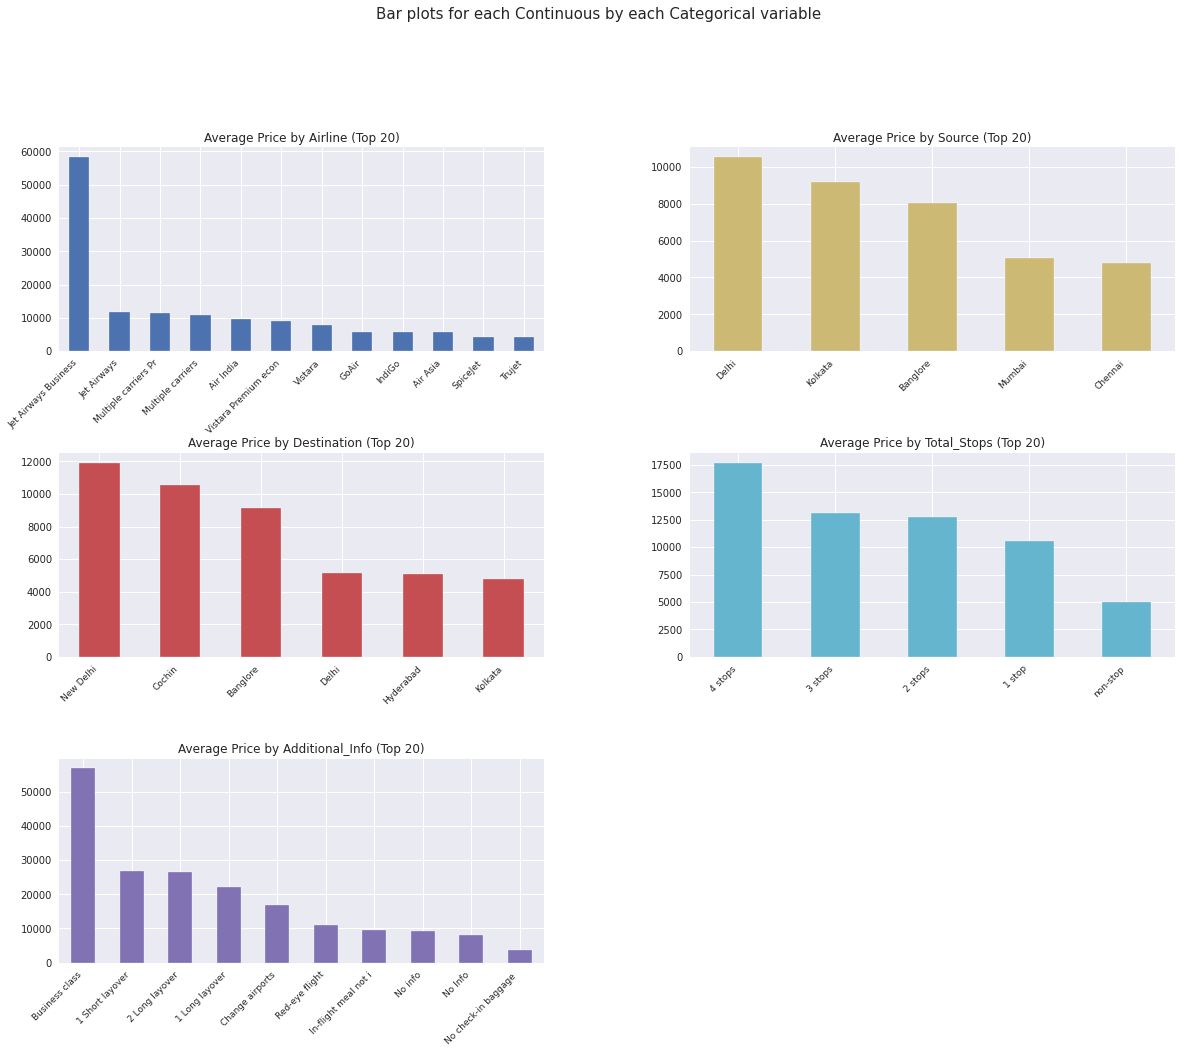

Time to run AutoViz (in seconds) = 3.005

 ###################### VISUALIZATION Completed ########################


In [363]:
AV= AutoViz_Class()
df_autoviz= AV.AutoViz('https://raw.githubusercontent.com/AdelaFarah13/Data-Source/main/Project%20Final%20Test/Data_Train.xlsx%20-%20Sheet1.csv')

### Drop column not Necesarry

In [364]:
# Drop kolom Dep_Time dan Arrival_time
drop_column(train_data, ['Dep_Time','Arrival_Time'])

#Drop column Duration
drop_column(train_data,['Duration'])

### Concate all columns

In [365]:
data_train_clean= pd.concat([categorical,Airline,Source,Destination,Add_info, train_data[continous_col], train_data['Price']],axis=1)

In [366]:
data_train_clean.head()

Airline    Source Destination  ... Duration_hours  Duration_minute  Price
0       IndiGo  Banglore   New Delhi  ...       0.042553         0.909091   3897
1    Air India   Kolkata    Banglore  ...       0.148936         0.454545   7662
2  Jet Airways     Delhi      Cochin  ...       0.404255         0.000000  13882
3       IndiGo   Kolkata    Banglore  ...       0.106383         0.454545   6218
4       IndiGo  Banglore   New Delhi  ...       0.085106         0.818182  13302

[5 rows x 47 columns]

In [367]:
# Drop column categorical
drop_column(data_train_clean,['Airline','Source','Destination','Additional_Info','Duration'])

In [368]:
data_train_clean.head()

Total_Stops  Route_1  Route_2  ...  Duration_hours  Duration_minute  Price
0            0        0       13  ...        0.042553         0.909091   3897
1            1        2       25  ...        0.148936         0.454545   7662
2            1        3       32  ...        0.404255         0.000000  13882
3            2        2       34  ...        0.106383         0.454545   6218
4            2        0       34  ...        0.085106         0.818182  13302

[5 rows x 42 columns]

In [369]:
print('Final Variable in DataFrame:{} columns'.format(data_train_clean.shape[1]))

Final Variable in DataFrame:42 columns


## Handling Outlier

In [370]:
def plot(df,col):
  fig, (ax1, ax2) = plt.subplots(2,1)
  sns.distplot(df[col], ax=ax1)
  sns.boxplot(df[col], ax=ax2)

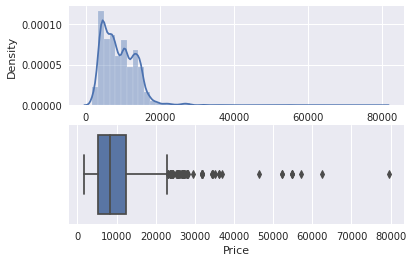

In [371]:
plot(data_train_clean,'Price')

Grafik Distribusi pada kolom price:
Terlihat positif Skewed distribution

Grafik boxplot: Terlihat ada outlier.

Jika kita membuat suatu asumsi jika harga di atas 40.000 sudah pasti outlier data.
Author memilih batas Outlier > 40.000 agar data tidak banyak terbuang

In [372]:
data_train_clean['Price']=np.where(data_train_clean['Price']>=40_000, data_train_clean['Price'].median(),data_train_clean['Price'])

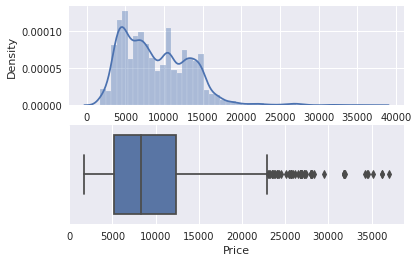

In [373]:
# After handle outlier
plot(data_train_clean,'Price')

## Analysis Correlation

### Pearson Correlation between Price, Total Stops and Route

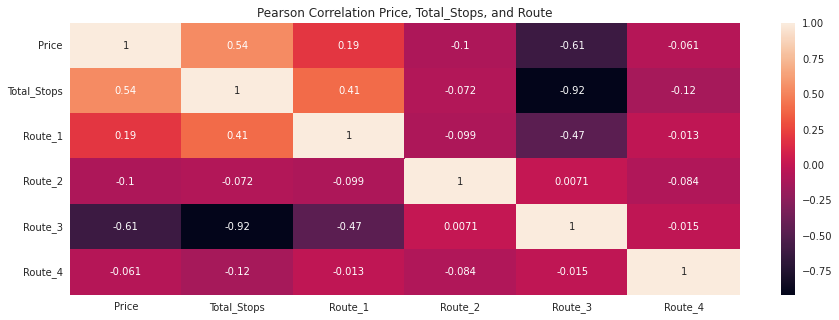

In [374]:
plt.figure(figsize = (15,5))
sns.heatmap(data_train_clean[['Price','Total_Stops','Route_1','Route_2','Route_3','Route_4']].corr(), annot = True, linecolor="red", cbar=True)

plt.title('Pearson Correlation Price, Total_Stops, and Route')
plt.show()

Menggunakan Analysis Correlation kita dapat melihat kolom Total Stops dan kolom Route 1-4 tidak lagi mempunyai korelasi yang significant.

### Pearson Correlation between Price, Airlines

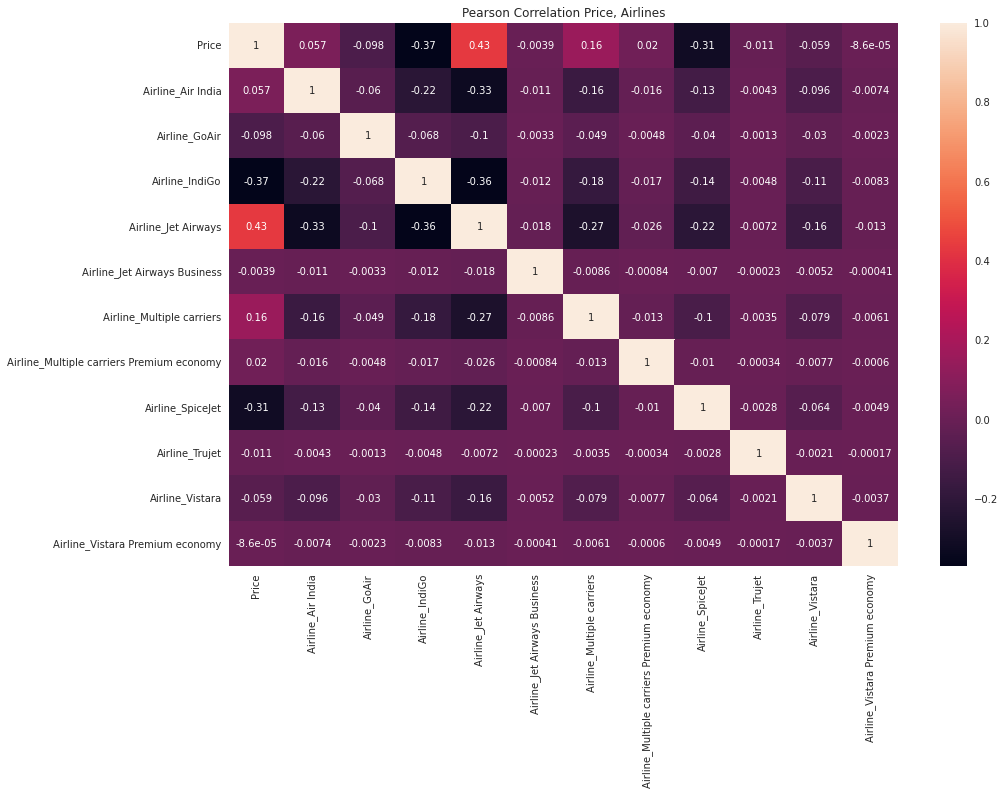

In [375]:
plt.figure(figsize = (15,10))
sns.heatmap(data_train_clean[['Price','Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy']].corr(), annot = True, linecolor="red", cbar=True)

plt.title('Pearson Correlation Price, Airlines')
plt.show()

### Pearson Correlation between Price, Destination and Source

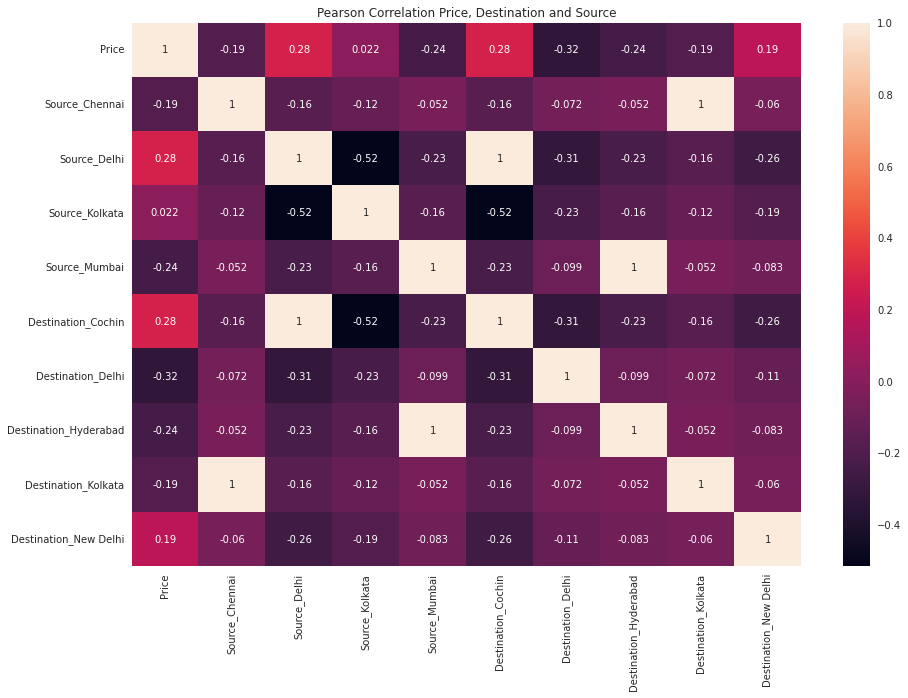

In [376]:
plt.figure(figsize = (15,10))
sns.heatmap(data_train_clean[['Price','Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi',]].corr(), annot = True, linecolor="red", cbar=True)

plt.title('Pearson Correlation Price, Destination and Source')
plt.show()

Berdasarkan grafik heatmap diatas, terdapat korelasi yang kuat antara soure dan Destination, yaitu:


*   Source_Chennai → Destination_Kolkata
*   Source_Delhi → Destination_Cochin
*   Source_Mumbai → Destination_Hyderabad 

### Pearson Correlation between Price and Additional Info

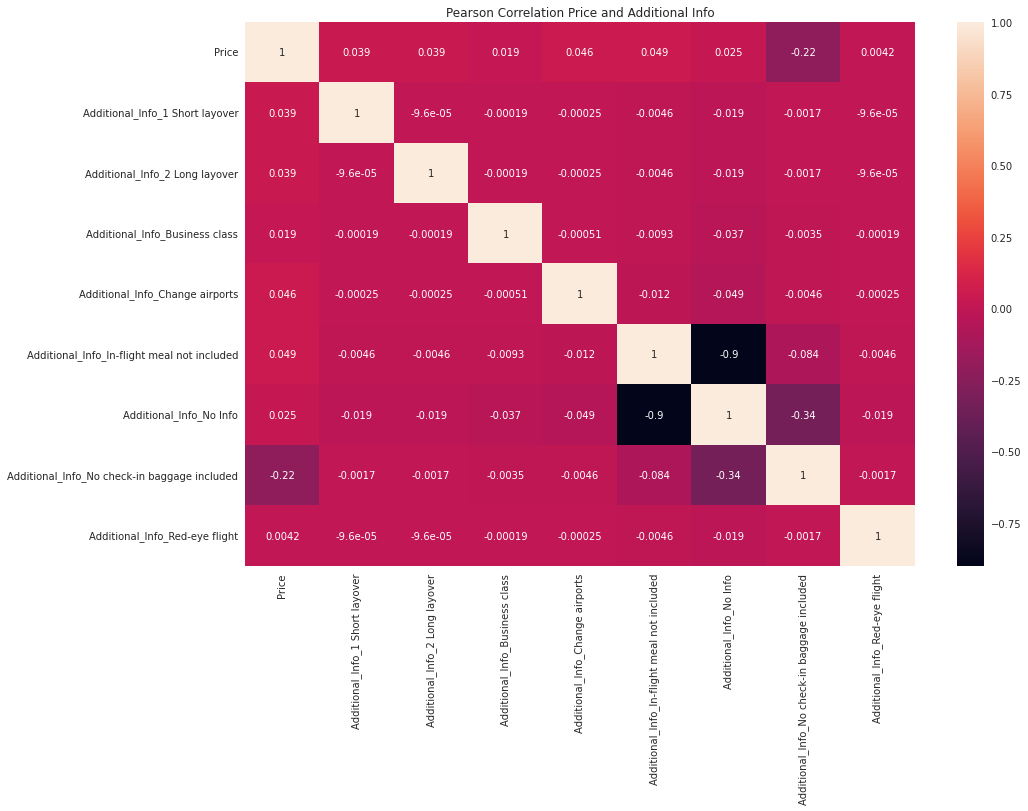

In [377]:
plt.figure(figsize = (15,10))
sns.heatmap(data_train_clean[['Price','Additional_Info_1 Short layover', 'Additional_Info_2 Long layover',
       'Additional_Info_Business class', 'Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included',
       'Additional_Info_No Info',
       'Additional_Info_No check-in baggage included',
       'Additional_Info_Red-eye flight']].corr(), annot = True, linecolor="red", cbar=True)

plt.title('Pearson Correlation Price and Additional Info')
plt.show()

### Pearson Correlation betwwen Price and Numerical Data

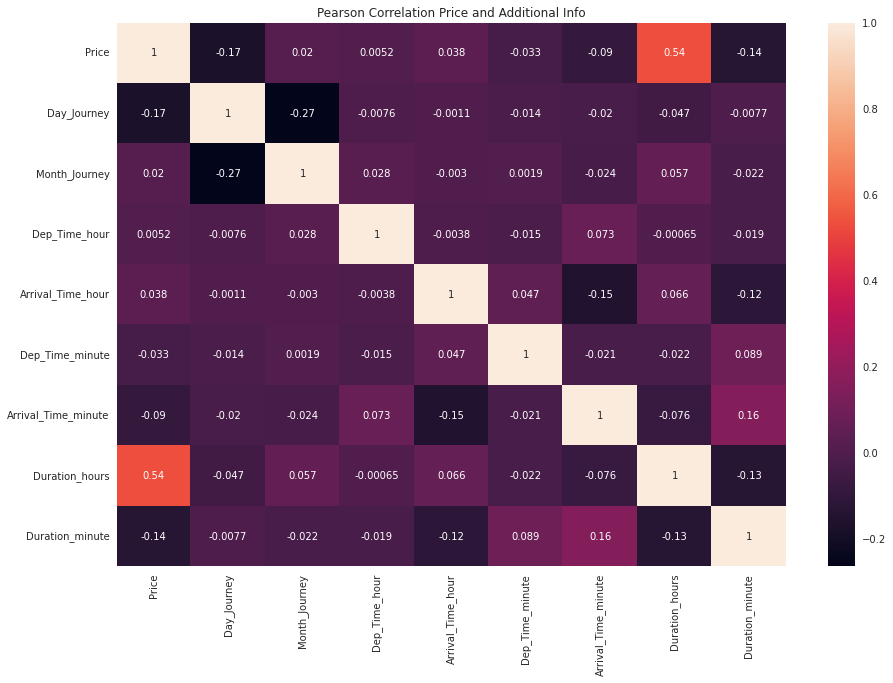

In [378]:
plt.figure(figsize = (15,10))
sns.heatmap(data_train_clean[['Price','Day_Journey',
       'Month_Journey', 'Dep_Time_hour', 'Arrival_Time_hour',
       'Dep_Time_minute', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_minute']].corr(), annot = True, linecolor="red", cbar=True)

plt.title('Pearson Correlation Price and Additional Info')
plt.show()

## Split data dependent and independent feature

In [379]:
data_train_clean.head()

Total_Stops  Route_1  Route_2  ...  Duration_hours  Duration_minute    Price
0            0        0       13  ...        0.042553         0.909091   3897.0
1            1        2       25  ...        0.148936         0.454545   7662.0
2            1        3       32  ...        0.404255         0.000000  13882.0
3            2        2       34  ...        0.106383         0.454545   6218.0
4            2        0       34  ...        0.085106         0.818182  13302.0

[5 rows x 42 columns]

In [380]:
X = data_train_clean.drop(['Price','Route_1','Route_2','Route_3','Route_4'],axis=1)
#X = data_train_clean.drop('Price',axis=1)
y = data_train_clean['Price'] # Target Variable

## Selecting Feature

aims to get the best feature for countribute most and has a good relationship with the target variable

In [381]:
from sklearn.feature_selection import mutual_info_classif

In [382]:
mutual_info_classif(X,y)

array([2.11758697, 0.74927551, 0.09265018, 0.69144229, 0.94116064,
       0.01179847, 0.57225868, 0.00854128, 0.31628562, 0.        ,
       0.22877688, 0.        , 0.17120255, 1.52913815, 0.88772385,
       0.28970321, 1.53791081, 0.41165534, 0.284368  , 0.17196421,
       0.37418537, 0.02332617, 0.01402936, 0.01305818, 0.        ,
       0.59126986, 2.01947503, 0.16592027, 0.00901588, 1.0810523 ,
       1.05265115, 1.45256735, 1.89325567, 1.26790687, 1.59600089,
       1.7424729 , 1.13853734])

In [383]:
imp =pd.DataFrame(mutual_info_classif(X,y),index=X.columns)

In [384]:
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

importance
Total_Stops                                     2.108309
Additional_Info_No Info                         2.024929
Arrival_Time_hour                               1.922007
Duration_hours                                  1.698096
Arrival_Time_minute                             1.632866
Destination_Cochin                              1.555578
Source_Delhi                                    1.527206
Dep_Time_hour                                   1.496795
Dep_Time_minute                                 1.264464
Duration_minute                                 1.141769
Month_Journey                                   1.056410
Day_Journey                                     1.043378
Airline_Jet Airways                             0.918679
Source_Kolkata                                  0.887665
Airline_Air India                               0.776122
Airline_IndiGo                                  0.696644
Additional_Info_In-flight meal not included     0.606038
Airline_Multiple carriers                       0.584400
Destination_Delhi                               0.421021
Destination_New Delhi                           0.382296
Airline_SpiceJet                                0.329827
Source_Mumbai                                   0.285666
Destination_Hyderabad                           0.282769
Airline_Vistara                                 0.217235
Destination_Kolkata                             0.186378
Source_Chennai                                  0.173205
Additional_Info_No check-in baggage included    0.172762
Airline_GoAir                                   0.105756
Airline_Multiple carriers Premium economy       0.022520
Additional_Info_Business class                  0.012168
Additional_Info_2 Long layover                  0.008409
Airline_Jet Airways Business                    0.003684
Additional_Info_Change airports                 0.002128
Airline_Vistara Premium economy                 0.000000
Additional_Info_Red-eye flight                  0.000000
Additional_Info_1 Short layover                 0.000000
Airline_Trujet                                  0.000000

Metode Mutual Info Classif pada dasarnya memanfaatkan *mutual information* atau kata lain mengukur ketergantungan fitur dengan nilai target. 

# Modeling

Split our data to data train and data test

In [385]:
from sklearn.model_selection import train_test_split

Train Test Split:

*   Training set 80%
*   Testing set 20%



In [386]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42)

In [387]:
print('X_train.shape :', X_train.shape)
print('X_test.shape :', X_test.shape)
print('y_train.shape :', y_train.shape)
print('y_test.shape :', y_test.shape)

X_train.shape : (8369, 37)
X_test.shape : (2093, 37)
y_train.shape : (8369,)
y_test.shape : (2093,)


In [388]:
from sklearn import metrics
import pickle

In [389]:
# from google.colab import drive
# drive.mount('/content/drive')\

In [390]:
X_train.head()

Total_Stops  Airline_Air India  ...  Duration_hours  Duration_minute
6727            0                  0  ...        0.021277         0.545455
6322            2                  0  ...        0.191489         0.000000
6874            2                  0  ...        0.319149         0.545455
3493            2                  0  ...        0.085106         0.909091
611             2                  1  ...        0.425532         0.272727

[5 rows x 37 columns]

In [391]:
def predict(ml_model,dump):
  
  #Model yang dipakai
  print('Model : {}'.format(ml_model))

  # Fit model dengan data train
  model = ml_model.fit(X_train,y_train)

  # Model training score
  print('Training score: {}'.format(model.score(X_train,y_train)))

  #Model test score
  print('Test score: {}'.format(model.score(X_test,y_test)))
  print('\n')
  
  # Model Prediction
  y_prediction = model.predict(X_test)
  print('prediction are:\n {}'.format(y_prediction))
  print('\n')
   
  # Create new dataframe
  df_predict = pd.DataFrame(data=y_prediction,
                          columns=['y_predic'],
                          index=X_test.index.copy())
  df_predict = pd.merge(y_test, df_predict, how='left', left_index=True, right_index=True)

  print('Data y_test and y_predict')
  print(df_predict.head())
  print('\n')
  # r2 score:
  r2_score = metrics.r2_score(y_test,y_prediction)
  print('r2 score is {:0.4f}'.format(r2_score))
 
  # Model Evoluation with MAE, MSE, RMSE
  print('MAE:', metrics.mean_absolute_error(y_test, y_prediction))
  print('MSE:', metrics.mean_squared_error(y_test, y_prediction))
  print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_prediction)))

  #fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
  sns.distplot(y_test-y_prediction)

  if dump == 1:
    file = open('/content/Data-Source/Project_Final_Test/model.pxl','wb')
    pickle.dump(model,file)

## Linear Regression

In [392]:
from sklearn.linear_model import LinearRegression

Model : LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Training score: 0.6444587235121174
Test score: 0.64114843364973


prediction are:
 [16700.375  5316.5    4709.375 ... 12247.25  12093.875 12028.375]


Data y_test and y_predict
        Price   y_predic
2150  17996.0  16700.375
3784   3873.0   5316.500
714    4462.0   4709.375
7558   2228.0   4650.875
7413   4991.0   2349.750


r2 score is 0.6411
MAE: 1849.7969421882465
MSE: 7120851.471392738
RMSE: 2668.4923592532054


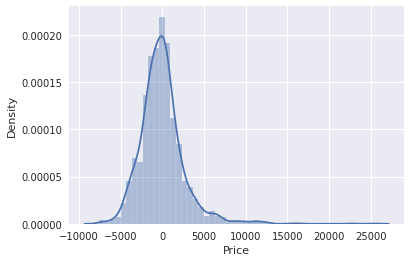

In [393]:
predict(LinearRegression(),0)

In [394]:
reg_lr = LinearRegression().fit(X_train, y_train)

In [395]:
# Accuracy training and test sets
print('Training score: {}'.format(reg_lr.score(X_train, y_train)))
print('Test score: {}'.format(reg_lr.score(X_test, y_test)))

Training score: 0.6444587235121174
Test score: 0.64114843364973


In [396]:
#Prediction Variable 'y_prediction'
y_predic_lr = reg_lr.predict(X_test)
print('Prediction are:\n {}'.format(y_predic_lr))

Prediction are:
 [16700.375  5316.5    4709.375 ... 12247.25  12093.875 12028.375]


In [397]:
df_predict = pd.DataFrame(data=y_predic_lr,
                          columns=['y_predic'],
                          index=X_test.index.copy())
df_predict = pd.merge(y_test, df_predict, how='left', left_index=True, right_index=True)

In [398]:
df_predict.head()

Price   y_predic
2150  17996.0  16700.375
3784   3873.0   5316.500
714    4462.0   4709.375
7558   2228.0   4650.875
7413   4991.0   2349.750

In [399]:
#R squere eror
r2_score_lr = metrics.r2_score(y_test,y_predic_lr)
print('r2 score is {}'.format(r2_score_lr))
print('\n')
print('MAE:', metrics.mean_absolute_error(y_test, y_predic_lr))
print('mae/mean ration:', metrics.mean_absolute_error(y_test, y_predic_lr)/len(y_predic_lr))
print('MSE:', metrics.mean_squared_error(y_test, y_predic_lr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predic_lr)))

r2 score is 0.64114843364973


MAE: 1849.7969421882465
mae/mean ration: 0.8838016923976333
MSE: 7120851.471392738
RMSE: 2668.4923592532054


In [400]:
#coeficient

intercept = reg_lr.intercept_
feature = pd.DataFrame(reg_lr.coef_, X.columns, columns=['coefficient'])
feature.sort_values(by = 'coefficient', ascending=False)

coefficient
Destination_Cochin                            2.282887e+16
Destination_New Delhi                         1.029549e+15
Source_Kolkata                                1.029549e+15
Destination_Delhi                             1.029549e+15
Destination_Hyderabad                         1.011304e+15
Source_Chennai                                9.850471e+14
Destination_Kolkata                           4.450212e+13
Source_Mumbai                                 1.824482e+13
Additional_Info_1 Short layover               9.119319e+03
Additional_Info_2 Long layover                7.598947e+03
Airline_Jet Airways                           6.537689e+03
Airline_Multiple carriers Premium economy     4.291959e+03
Duration_hours                                4.189352e+03
Airline_Multiple carriers                     3.924499e+03
Airline_Vistara Premium economy               3.721524e+03
Airline_Air India                             2.708626e+03
Airline_Vistara                               2.136474e+03
Total_Stops                                   7.304508e+02
Arrival_Time_minute                           3.791046e+02
Airline_IndiGo                                3.784202e+02
Airline_GoAir                                 2.352746e+02
Dep_Time_hour                                 1.944800e+02
Dep_Time_minute                               1.357735e+02
Duration_minute                               1.179338e+02
Airline_SpiceJet                              4.201610e+01
Arrival_Time_hour                            -3.950304e+02
Airline_Trujet                               -6.119321e+02
Month_Journey                                -6.474681e+02
Additional_Info_Change airports              -9.270856e+02
Day_Journey                                  -1.580118e+03
Additional_Info_Business class               -1.617203e+03
Airline_Jet Airways Business                 -2.382229e+03
Additional_Info_Red-eye flight               -2.547294e+03
Additional_Info_No Info                      -6.067667e+03
Additional_Info_No check-in baggage included -6.468952e+03
Additional_Info_In-flight meal not included  -9.926308e+03
Source_Delhi                                 -2.179932e+16

In [401]:
# Transform the unit of coefficient

stdevs=[]
for i in X.columns:
  stdev = data_train_clean[i].std()
  stdevs.append(stdev)

feature['stdev'] = np.array(stdevs).reshape(-1,1)
feature['importance'] = feature['coefficient'] * feature['stdev']
feature.importance = feature.importance.abs()

### Feature Importance

In [466]:
feature.sort_values(by ='importance', ascending=False).head(10).reset_index()

index  ...    importance
0                           Destination_Cochin  ...  1.125005e+16
1                                 Source_Delhi  ...  1.074269e+16
2                               Source_Kolkata  ...  4.588810e+14
3                            Destination_Delhi  ...  3.356769e+14
4                        Destination_New Delhi  ...  2.907251e+14
5                        Destination_Hyderabad  ...  2.521973e+14
6                               Source_Chennai  ...  1.845344e+14
7                          Destination_Kolkata  ...  8.336832e+12
8                                Source_Mumbai  ...  4.549861e+12
9  Additional_Info_In-flight meal not included  ...  3.847239e+03

[10 rows x 4 columns]

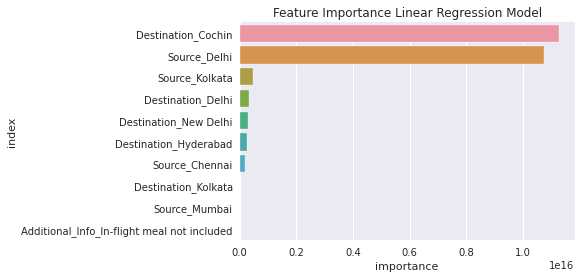

In [469]:
plt.title('Feature Importance Linear Regression Model')
sns.barplot(data=feature.sort_values(by ='importance', ascending=False).head(10).reset_index(), x='importance', y='index')

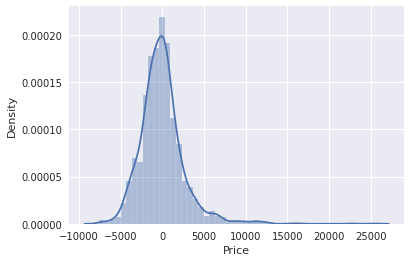

In [403]:
sns.distplot(y_test-y_predic_lr)
plt.show()

In [404]:
fig = px.scatter(df_predict,
                 x = 'Price',
                 y = 'y_predic',
                 opacity= 0.65,
                   # trendline_color_override='darkblue'
                 )
fig.update_layout(xaxis_title = 'y_test', yaxis_title = 'y_predic')

fig.show()

## Decision Tree Regreesion

In [405]:
from sklearn.tree import DecisionTreeRegressor

Model : DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
Training score: 0.995636081971856
Test score: 0.8512680307587395


prediction are:
 [14815.  3873.  4148. ... 10262.  6795. 13377.]


Data y_test and y_predict
        Price  y_predic
2150  17996.0   14815.0
3784   3873.0    3873.0
714    4462.0    4148.0
7558   2228.0    2071.0
7413   4991.0    4885.0


r2 score is 0.8513
MAE: 722.669453734671
MSE: 2951354.714113182
RMSE: 1717.950730991195


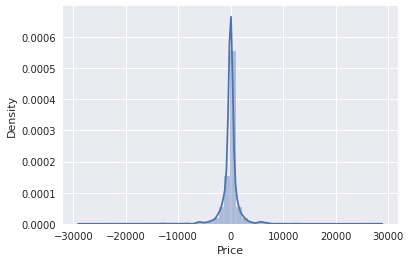

In [406]:
predict(DecisionTreeRegressor(),0)

### Feature Importance

In [470]:
Dt_reg = DecisionTreeRegressor().fit(X_train,y_train)

In [472]:
importance_dt = pd.DataFrame({
    'feature': X_train.columns,
    'importance': Dt_reg.feature_importances_
}).sort_values('importance', ascending=False)

In [473]:
importance_dt.head(10)

feature  importance
35                               Duration_hours    0.458586
29                                  Day_Journey    0.122778
4                           Airline_Jet Airways    0.082566
30                                Month_Journey    0.068728
25  Additional_Info_In-flight meal not included    0.058055
0                                   Total_Stops    0.037866
31                                Dep_Time_hour    0.025524
6                     Airline_Multiple carriers    0.024334
32                            Arrival_Time_hour    0.022623
33                              Dep_Time_minute    0.018023

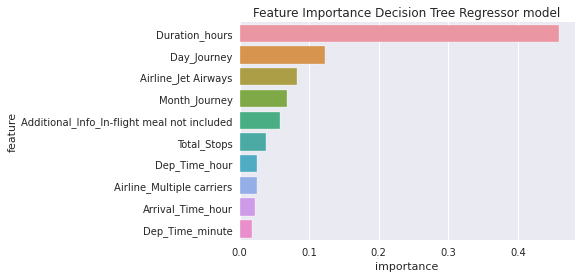

In [474]:
plt.title('Feature Importance Decision Tree Regressor model')
sns.barplot(data=importance_dt.head(10), x='importance', y='feature');

## KNeighbors Regressor

KNN ga cocok kalo datanya besar

In [407]:
from sklearn.neighbors import KNeighborsRegressor

Model : KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')
Training score: 0.87230987154623
Test score: 0.798421918948415


prediction are:
 [16228.2  3873.   4636.  ... 11106.4 10135.8 13876.4]


Data y_test and y_predict
        Price  y_predic
2150  17996.0   16228.2
3784   3873.0    3873.0
714    4462.0    4636.0
7558   2228.0    2606.4
7413   4991.0    3967.4


r2 score is 0.7984
MAE: 1173.6290492116577
MSE: 4000003.6495747734
RMSE: 2000.0009123934851


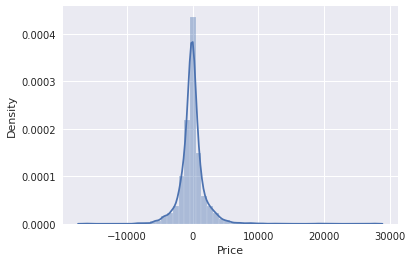

In [408]:
predict(KNeighborsRegressor(),0)

## Random Forest default Parameter

In [409]:
from sklearn.ensemble import RandomForestRegressor

Model : RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
Training score: 0.9842781674242232
Test score: 0.8947704190273761


prediction are:
 [14991.17  3870.73  4204.36 ... 10387.88  7658.81 13407.76]


Data y_test and y_predict
        Price      y_predic
2150  17996.0  14991.170000
3784   3873.0   3870.730000
714    4462.0   4204.360000
7558   2228.0   2270.420000
7413   4991.0   4322.453333


r2 score is 0.8948
MAE: 661.5302171201814
MSE: 2088117.4467873
RMSE: 1445.0319881536534


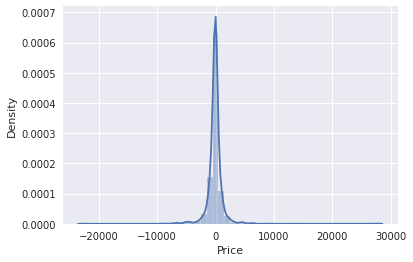

In [410]:
predict(RandomForestRegressor(),0)

Cara biasa

In [411]:
model_rf = RandomForestRegressor(random_state=42)

In [412]:
from pprint import pprint

In [413]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(model_rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


### Random Hyperparameter Grid


In [414]:
from sklearn.model_selection import RandomizedSearchCV

In [415]:
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=6)]

#Number of feature to consider at every split
max_feature = ['auto','sqrt']

#Max number of levels in tree
max_depth = [int(x) for x in np.linspace(start = 5, stop= 30, num=4)]
max_depth.append(None)

#Min number of samples required to split a node
min_samples_split = [5,10,15,100]

#Min number of sample required at each leaf node
min_samples_leaf = [1,2,4]


In [416]:
random_grid={
    'n_estimators': n_estimators,
    'max_features': max_feature,
    'max_depth': max_depth,
    'min_samples_split' : min_samples_split
}

In [417]:
rf_random = RandomizedSearchCV(estimator=model_rf, param_distributions=random_grid, cv=3, verbose=2, random_state=42, n_jobs=-1)

In [418]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.6min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [419]:
rf_random.best_params_

{'max_depth': 21,
 'max_features': 'auto',
 'min_samples_split': 10,
 'n_estimators': 540}

In [477]:
# Evaluate Random Search
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape


    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('R2 score: {:0.4f}'.format(metrics.r2_score(y_test,predictions)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [449]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 680.6491 degrees.
R2 score: 0.89
Accuracy = 91.83%.


In [448]:
best_model = rf_random.best_estimator_
best_model.fit(X_train, y_train)
best_accuracy = evaluate(best_model, X_test, y_test)

Model Performance
Average Error: 684.3532 degrees.
R2 score: 0.90
Accuracy = 91.76%.


### Feature Importance

In [452]:
importance_fr = pd.DataFrame({
    'feature': X_train.columns,
    'importance': base_model.feature_importances_
}).sort_values('importance', ascending=False)

In [453]:
importance_fr.head(10)

feature  importance
35                               Duration_hours    0.460414
29                                  Day_Journey    0.117731
4                           Airline_Jet Airways    0.081028
30                                Month_Journey    0.070310
25  Additional_Info_In-flight meal not included    0.041993
0                                   Total_Stops    0.035388
6                     Airline_Multiple carriers    0.023520
31                                Dep_Time_hour    0.022415
32                            Arrival_Time_hour    0.022135
26                      Additional_Info_No Info    0.020503

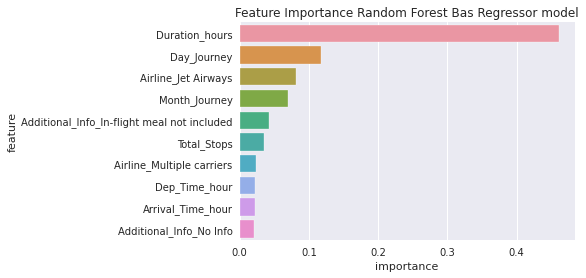

In [454]:
plt.title('Feature Importance Random Forest Bas Regressor model')
sns.barplot(data=importance_fr.head(10), x='importance', y='feature');

## CatBoost Regressor	

In [423]:
!pip3 install catboost

In [424]:
import catboost as cb
from catboost import CatBoostRegressor

#CatBoostRegressor()

Model : <catboost.core.CatBoostRegressor object at 0x7fec98c3f0d0>
Learning rate set to 0.057275
0:	learn: 4206.6734128	total: 2.25ms	remaining: 2.24s
1:	learn: 4040.6205625	total: 4.51ms	remaining: 2.25s
2:	learn: 3884.6810865	total: 6.51ms	remaining: 2.16s
3:	learn: 3745.4895930	total: 8.2ms	remaining: 2.04s
4:	learn: 3617.7794438	total: 9.9ms	remaining: 1.97s
5:	learn: 3490.6876237	total: 12ms	remaining: 1.98s
6:	learn: 3373.7332849	total: 13.6ms	remaining: 1.93s
7:	learn: 3268.0380252	total: 15.4ms	remaining: 1.9s
8:	learn: 3165.9179467	total: 17.1ms	remaining: 1.88s
9:	learn: 3075.5713785	total: 18.7ms	remaining: 1.85s
10:	learn: 2999.7066119	total: 20.4ms	remaining: 1.84s
11:	learn: 2928.4540617	total: 22.1ms	remaining: 1.82s
12:	learn: 2864.9436028	total: 23.7ms	remaining: 1.8s
13:	learn: 2791.7452689	total: 25.5ms	remaining: 1.79s
14:	learn: 2728.5919560	total: 27.3ms	remaining: 1.79s
15:	learn: 2677.8028838	total: 29ms	remaining: 1.78s
16:	learn: 2622.5359712	total: 31.4ms	rem

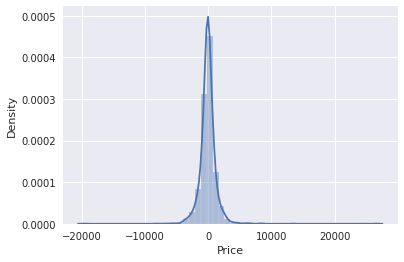

In [425]:
predict(cb.CatBoostRegressor(),0)

### Hyperparameter Tuning with CatBoost for improving performance

In [426]:
from catboost import CatBoostRegressor

catboost = CatBoostRegressor(learning_rate=0.1,random_strength=100)

catboost.fit(X_train, y_train)

predictions = catboost.predict(X_test)

r2score= metrics.r2_score(y_test,predictions)

print("r2 score: {}".format(r2score))

0:	learn: 4215.2031105	total: 1.96ms	remaining: 1.96s
1:	learn: 4171.8413853	total: 4.18ms	remaining: 2.08s
2:	learn: 4133.4015972	total: 6.06ms	remaining: 2.01s
3:	learn: 4010.5156754	total: 7.82ms	remaining: 1.95s
4:	learn: 3967.4068527	total: 9.28ms	remaining: 1.85s
5:	learn: 3808.0010950	total: 11.1ms	remaining: 1.83s
6:	learn: 3718.3327405	total: 12.9ms	remaining: 1.84s
7:	learn: 3675.1413259	total: 14.9ms	remaining: 1.85s
8:	learn: 3603.1993913	total: 16.9ms	remaining: 1.86s
9:	learn: 3582.4826074	total: 18.7ms	remaining: 1.85s
10:	learn: 3579.7807101	total: 20ms	remaining: 1.8s
11:	learn: 3542.0516072	total: 21.8ms	remaining: 1.8s
12:	learn: 3414.9992985	total: 23.9ms	remaining: 1.81s
13:	learn: 3395.8016941	total: 25.7ms	remaining: 1.81s
14:	learn: 3384.3764514	total: 27.8ms	remaining: 1.82s
15:	learn: 3354.7101191	total: 29.8ms	remaining: 1.83s
16:	learn: 3277.8978345	total: 31.6ms	remaining: 1.83s
17:	learn: 3224.2459638	total: 33.5ms	remaining: 1.83s
18:	learn: 3221.0114188	

r2 score mengalamai kenaikan namun tidak terlalu significant.

In [427]:
test_preds = catboost.predict(X_test)
test_preds

array([15353.08783215,  3895.77220802,  4660.56883222, ...,
        9684.98814995,  9426.10583773, 12965.89543741])

In [428]:
test_probs = catboost.predict(X_test)
test_probs

array([15353.08783215,  3895.77220802,  4660.56883222, ...,
        9684.98814995,  9426.10583773, 12965.89543741])

In [429]:
y_pred = catboost.predict(X_test)

In [430]:
pred_y = pd.DataFrame({'actual_value': y_test, 'predicted_value': y_pred, 'Difference': y_test-y_pred})
pred_y[:20]

actual_value  predicted_value   Difference
2150        17996.0     15353.087832  2642.912168
3784         3873.0      3895.772208   -22.772208
714          4462.0      4660.568832  -198.568832
7558         2228.0      2271.384689   -43.384689
7413         4991.0      4141.411062   849.588938
6678         7670.0      8319.738658  -649.738658
3763        14086.0     16431.339047 -2345.339047
10303        6386.0      5642.130817   743.869183
10595        6628.0      6969.839727  -341.839727
10186        6934.0      6410.007474   523.992526
8272         8714.0      8454.728068   259.271932
7029        13941.0     13654.250955   286.749045
6937        12898.0     12247.859000   650.141000
3812         4729.0      4414.523174   314.476826
3713         3625.0      3129.960973   495.039027
8689        10539.0      9906.132166   632.867834
3648        10262.0     11032.459776  -770.459776
9626         3841.0      3897.248171   -56.248171
3743         5201.0      6214.376516 -1013.376516
2418         5170.0      5733.536671  -563.536671

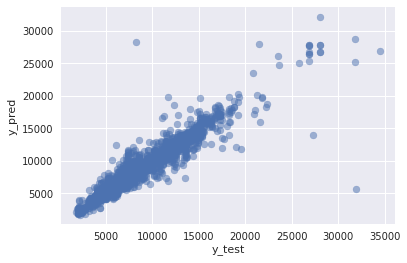

In [431]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

### Feature Importance

In [432]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': catboost.feature_importances_
}).sort_values('importance', ascending=False)

In [433]:
importance_df.head(10)

feature  importance
35                               Duration_hours   19.553040
29                                  Day_Journey   12.073998
4                           Airline_Jet Airways   10.760998
0                                   Total_Stops   10.647247
30                                Month_Journey    6.164359
32                            Arrival_Time_hour    4.037779
3                                Airline_IndiGo    3.959980
33                              Dep_Time_minute    3.366970
31                                Dep_Time_hour    3.337357
25  Additional_Info_In-flight meal not included    3.144346

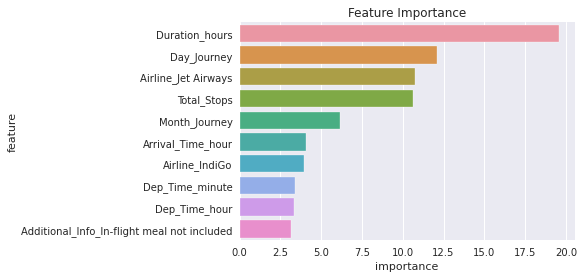

In [434]:
plt.title('Feature Importance CatBoost Regressor model')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

Metrics and Scoring: Quantifying the quality of Predictions

In [435]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, predictions)     # Best possible score is 1.0, lower values are worse

0.9028979021070138

In [436]:
from sklearn.metrics import max_error
max_error(y_test, predictions)  

26295.87220009164

In [437]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(y_test, predictions)    # best value is 0.0

0.018898992145164967

In [438]:
from sklearn.metrics import mean_poisson_deviance
mean_poisson_deviance(y_test, predictions)       # best value is 0.0

172.84084721361657

In [439]:
from sklearn.metrics import mean_gamma_deviance
mean_gamma_deviance(y_test, predictions)       #best value is 0.0

0.019645490682610317

## Validate Model

In [440]:
#catboost.classes_

In [441]:
# def predict_input(single_input):
  
#     input_df = pd.DataFrame([single_input])

#     continous_col = [col for col in input_df.columns if input_df[col].dtype==('int64','float64')]
#     input_df[continous_col] = scaler.transform(input_df[continous_col])

#     categorical_col = [col for col in input_df.columns if input_df[col].dtype=='object']
#     categorical_col.remove('Total_Stops')

#     dict_ttl_stop={'non-stop':0, '2 stops':1, '1 stop':2, '3 stops':3, '4 stops':4}
#     input_df['Total_Stops']= input_df['Total_Stops'].map(dict_ttl_stop)

#     for column in categorical_col:
#       dummies = pd.get_dummies(input_df[[column]])
#       input_df[dummies.columns] = dummies
    

#     for col in categorical_col:
#       input_df.drop(col,axis=1, inplace=True)

#     X_input = input_df.copy()
    
#     pred = catboost.predict(X_input)[0]
    
#     return pred

# Kesimpulan

Dari Hasil Data Collected, Exploratory Data Analysis, terdapat beberapa kesimpulan, yaitu:

1.   Berdasarkan dari beberapa model Regression yang telah author pilih, CatBoost Regressor mempunyai **R-squared(R2)** tertinggi sebesar 0.90 dan **Root Mean Squared Error(RMSE)** terkecil sebesar 1429.2393 dibandingkan dengan model Regression yang lain. Dimana model ini dapat dipakai untuk melakukan prediksi dari Flight Fare meski belum sempurna. Masih banyak cara untuk meningkatkan model dan mengevaluasi model untuk dapat diteliti lebih lanjut.
2.   Model Decision Tree Regression, Random Forest Regression, CatBoost Regressor sama-sama mempunyai feature importance yang paling tinggi yaitu feature Duration hour  yang artinya lama perjalanan/jauh penerbangan sangat mempengaruhi harga.

3. Harga pesawat juga dapat dipengaruhi oleh jenis/tipe pesawat. Pada data yang kita kumpulkan terdapat tipe ekonomi dan business/exlusive. Tipe pesawat yang business seperti Jet Airways Business mempunyai range harga tertinggi dibandingkan dengan maskapai yang lain.

4. Destinasi Bangalore → New Delhi, Kolkata → Bangalore, Delhi → Cochin merupakan destinasi terpadat penerbangannya. 
Hal ini dapat disebabkan oleh 5 kota diatas termasuk dalam Kota besar yang berada di Negara India, dan New Delhi menjadi pusat administarasi pemerintahan India. Bangalore termasuk penduduk terpadat dan Delhi adalah ibu kota dari Negara India. 

5. 1-stop atau 1 kali transit mempunyai range harga paling tinggi dibandingkan yang lain, dapat dikatakan total_stops tidak terlalu berpengaruh pada harga tiket pesawat 